# Imports 

In [1]:
from dataloader import DataLoader
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from plotter import Plotter
import numpy as np
import statsmodels.api as sm

from sklearn.decomposition import PCA

# Loading Data 

In [2]:
dataloader = DataLoader()

df_X_train, df_y_train, df_X_val, df_y_val, df_X_test, df_y_test = dataloader.load_data()

df_X_train = df_X_train.drop("noise", axis = 1)
df_X_val = df_X_val.drop("noise", axis = 1)
df_X_test = df_X_test.drop("noise", axis = 1)

print(df_X_train)

     CEO  MGR  CMGR  SNRMGR  TSC  CONS  SNRTSC  SNRCONS  salary     tenure
0      0    0     0       0    1     0       0        0  4260.0  32.539726
1      0    0     0       0    0     0       0        1  5460.0  28.172603
2      0    0     0       0    0     1       0        0  3730.0   5.895890
3      0    0     0       0    0     0       0        1  5860.0  32.958904
4      0    0     0       0    0     0       0        1  6130.0  31.657534
..   ...  ...   ...     ...  ...   ...     ...      ...     ...        ...
331    0    0     0       0    0     1       0        0  3730.0  28.553425
332    0    0     0       0    0     1       0        0  5730.0  10.175342
333    0    0     0       0    0     0       0        1  6800.0  13.024658
334    0    0     0       0    0     0       1        0  4930.0  31.471233
335    0    0     0       0    0     0       0        1  4660.0  11.756164

[336 rows x 10 columns]


In [3]:
X_train = df_X_train.to_numpy()
y_train = df_y_train.to_numpy()

X_val = df_X_val.to_numpy()
y_val = df_y_val.to_numpy()

X_test = df_X_test.to_numpy()
y_test = df_y_test.to_numpy()

plotter = Plotter()

# Linear Regression (Scikit Learn)

In [4]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

## Performance on training set

R2 = 0.988893678679417


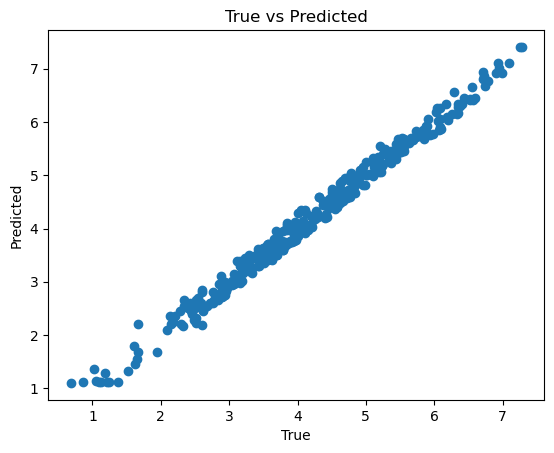

In [5]:
X_train_preds = clf.predict(X_train)
R2 = r2_score(X_train_preds, y_train)

plotter.scatter_plot(X_train_preds, y_train, "True vs Predicted", "True", "Predicted")
print("R2 = {}".format(R2))

## Seems to do not so well on low attrition scores

R2 = 0.6225053541911499


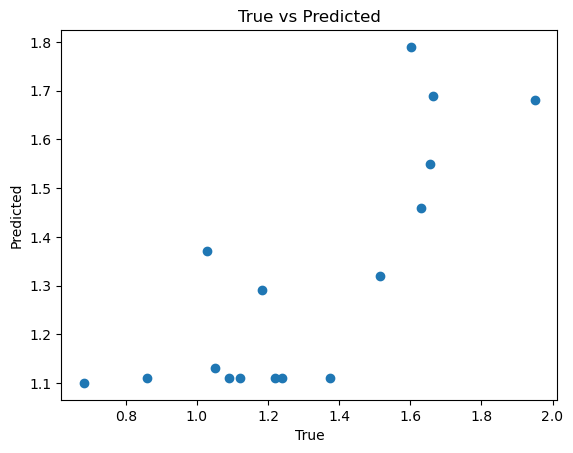

In [6]:
min_attrition = 0
max_attrition = 2

indices = np.where((y_train >= min_attrition) & (y_train <= max_attrition))[0]

y_train_low_attrition = y_train[indices]
X_train_preds_low_attrition = X_train_preds[indices]

R2 = r2_score(X_train_preds_low_attrition, y_train_low_attrition)
plotter.scatter_plot(X_train_preds_low_attrition, y_train_low_attrition, "True vs Predicted", "True", "Predicted")
print("R2 = {}".format(R2))

## Performance on Validation Set

R2 = 0.9779773501141459
rmse = 0.1945352315866834


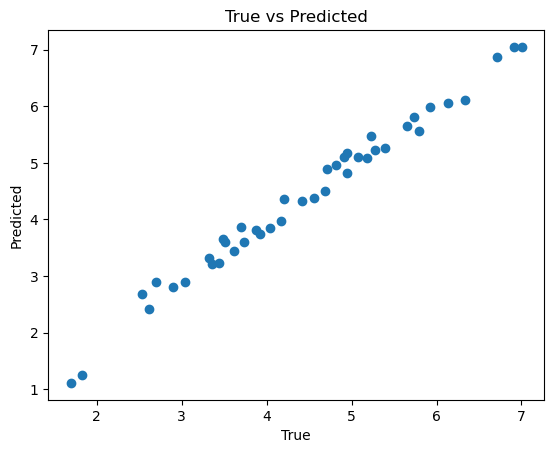

In [7]:
X_val_preds = clf.predict(X_val)
R2 = r2_score(X_val_preds, y_val)
rmse = np.sqrt(mean_squared_error(y_val, X_val_preds))

plotter.scatter_plot(X_val_preds, y_val, "True vs Predicted", "True", "Predicted")
print("R2 = {}".format(R2))
print("rmse = {}".format(rmse))

# Performance on test set

R2 = 0.9920073154878204
rmse = 0.1328227478287783


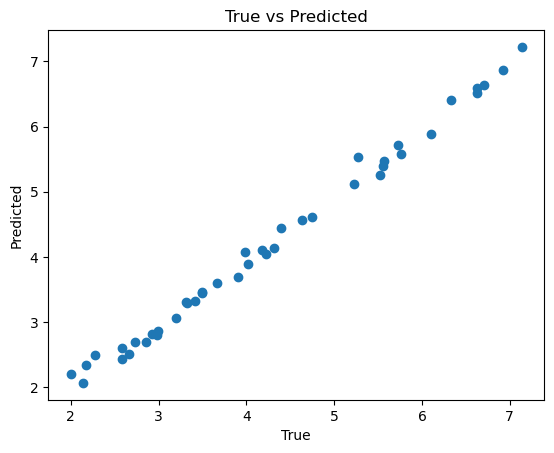

In [8]:
X_test_preds = clf.predict(X_test)
R2 = r2_score(X_test_preds, y_test)
rmse = np.sqrt(mean_squared_error(y_test, X_test_preds))

plotter.scatter_plot(X_test_preds, y_test, "True vs Predicted", "True", "Predicted")
print("R2 = {}".format(R2))
print("rmse = {}".format(rmse))

# Random Forrest

In [9]:
clf = RandomForestRegressor(n_estimators = 1000)
clf.fit(X_train, y_train)

C:\Users\emilh\AppData\Local\Temp\ipykernel_25888\2163811445.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000)

## Performance on training set

R2 = 0.9991993112009709


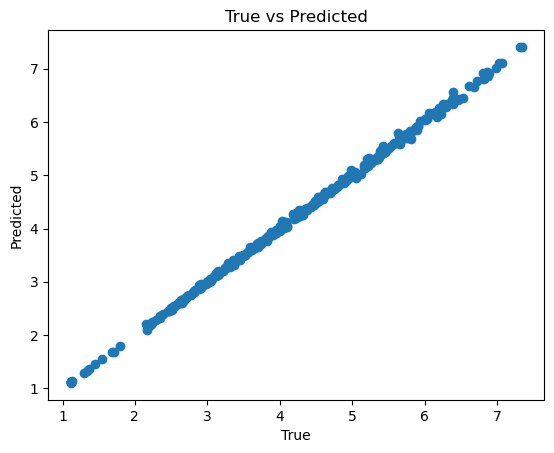

In [10]:
X_train_preds = clf.predict(X_train)
R2 = r2_score(X_train_preds, y_train)

plotter.scatter_plot(X_train_preds, y_train, "True vs Predicted", "True", "Predicted")
print("R2 = {}".format(R2))

## Performance on low attribitions

R2 = 0.99813194852785


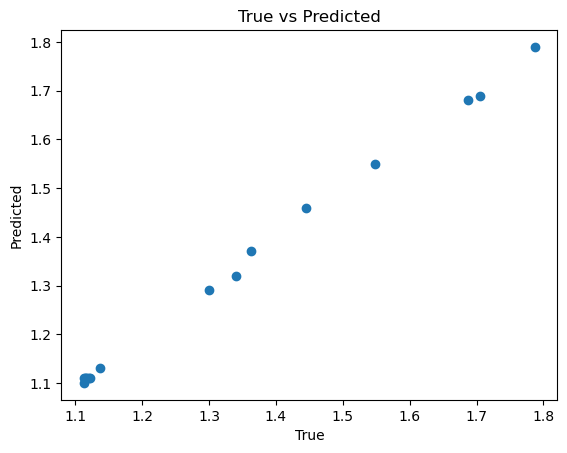

In [11]:
min_attrition = 0
max_attrition = 2

indices = np.where((y_train >= min_attrition) & (y_train <= max_attrition))[0]

y_train_low_attrition = y_train[indices]
X_train_preds_low_attrition = X_train_preds[indices]

R2 = r2_score(X_train_preds_low_attrition, y_train_low_attrition)
plotter.scatter_plot(X_train_preds_low_attrition, y_train_low_attrition, "True vs Predicted", "True", "Predicted")
print("R2 = {}".format(R2))

## Performance on Validation Set

R2 = 0.993874110870764
rmse = 0.1063675597588272


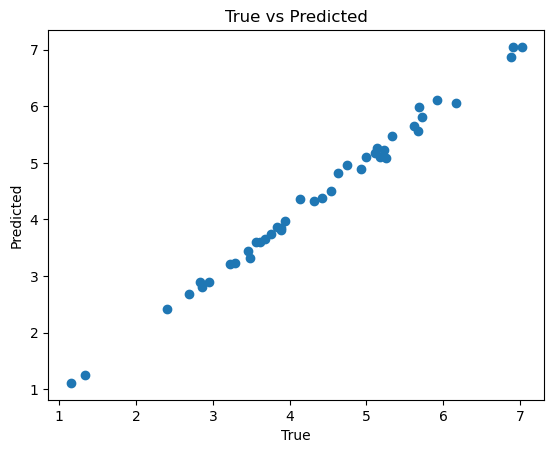

In [12]:
X_val_preds = clf.predict(X_val)
R2 = r2_score(X_val_preds, y_val)
rmse = np.sqrt(mean_squared_error(y_val, X_val_preds))

plotter.scatter_plot(X_val_preds, y_val, "True vs Predicted", "True", "Predicted")
print("R2 = {}".format(R2))
print("rmse = {}".format(rmse))

# Performance on test set

R2 = 0.9942955045279545
rmse = 0.11083256264679794


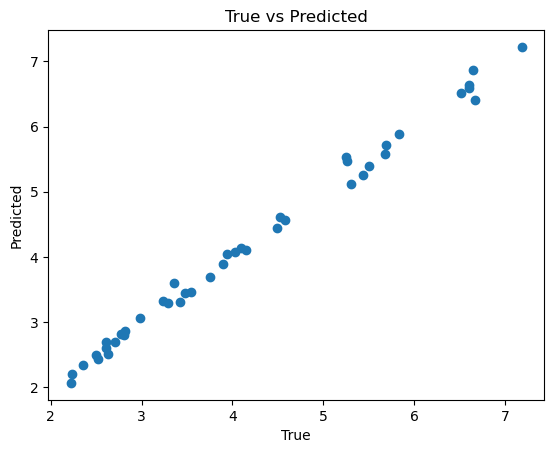

In [13]:
X_test_preds = clf.predict(X_test)
R2 = r2_score(X_test_preds, y_test)
rmse = np.sqrt(mean_squared_error(y_test, X_test_preds))

plotter.scatter_plot(X_test_preds, y_test, "True vs Predicted", "True", "Predicted")
print("R2 = {}".format(R2))
print("rmse = {}".format(rmse))

# Test on Noisy data

In [14]:
N1 = X_train.shape[0]
N2 = X_val.shape[0]
D = 500
var = 10

X_noise_1 = np.random.multivariate_normal(mean = np.zeros(D), cov = np.eye(D) * var, size = N1)
X_noise_2 = np.random.multivariate_normal(mean = np.zeros(D), cov = np.eye(D) * var, size = N2)

X_noise_train = np.hstack((X_train, X_noise_1))
X_noise_val = np.hstack((X_val, X_noise_2))

print(X_noise_train.shape)

clf = LinearRegression()
clf.fit(X_noise_train, y_train)

(336, 510)


LinearRegression()

# Performance on training data

R2 = 1.0


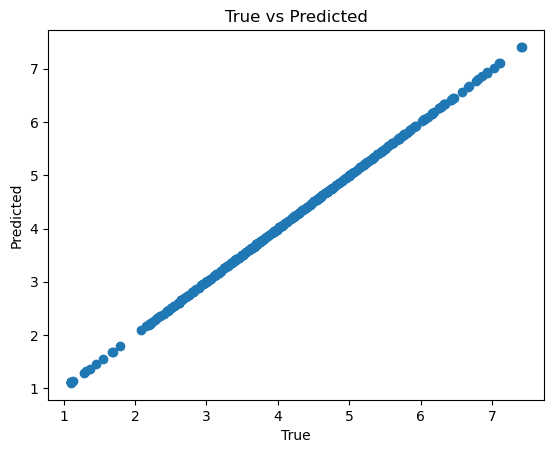

In [15]:
X_train_preds = clf.predict(X_noise_train)
R2 = r2_score(X_train_preds, y_train)

plotter.scatter_plot(X_train_preds, y_train, "True vs Predicted", "True", "Predicted")
print("R2 = {}".format(R2))

# Performance on Validation data

R2 = -0.5522806964482123


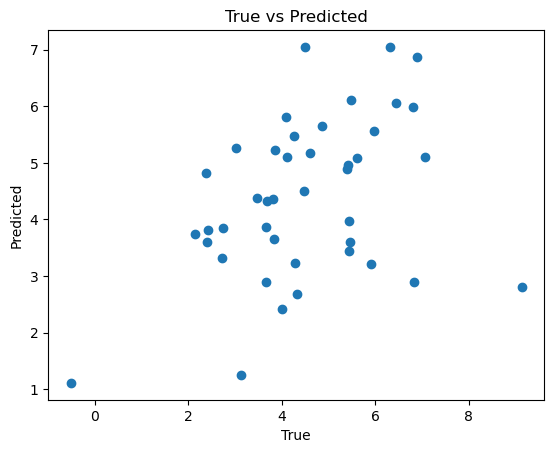

In [16]:
X_val_preds = clf.predict(X_noise_val)
R2 = r2_score(y_val, X_val_preds)

plotter.scatter_plot(X_val_preds, y_val, "True vs Predicted", "True", "Predicted")
print("R2 = {}".format(R2))

# Detecting Noisy Features

In [17]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_noise_train, y_train)

C:\Users\emilh\AppData\Local\Temp\ipykernel_25888\3102418072.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_noise_train, y_train)


RandomForestRegressor()

In [18]:
importances = rf.feature_importances_

print(importances)

[0.00000000e+00 5.33189647e-04 0.00000000e+00 7.74026449e-04
 3.43700653e-01 1.70187310e-01 1.93895129e-01 7.24486210e-02
 4.82295366e-02 1.31746624e-01 6.45279951e-05 5.17438237e-05
 1.31563743e-04 2.76802016e-05 2.14569610e-05 7.42172282e-05
 2.15881766e-05 1.52265361e-04 1.05806044e-04 1.27863235e-04
 3.48613208e-05 2.85124768e-05 4.54983307e-05 2.21687125e-05
 2.94548584e-05 3.98810014e-05 1.86818334e-04 1.34265302e-04
 1.24513858e-04 6.16417109e-05 2.24682726e-05 1.22629648e-04
 8.17481588e-05 2.78885063e-05 9.33743114e-05 1.53105341e-04
 1.21162349e-04 1.00339756e-04 3.60952279e-05 4.99528834e-05
 9.98416913e-05 8.88111030e-05 3.04274071e-05 2.89862798e-05
 1.87110850e-05 3.42462543e-05 9.65880668e-05 3.33019801e-04
 7.03249100e-05 1.92556210e-05 1.11630956e-04 5.12194811e-05
 2.05827543e-05 9.30090510e-05 2.26357714e-04 6.02499412e-05
 2.85376292e-05 3.43383460e-05 2.73344606e-05 6.65390930e-05
 1.40879019e-04 5.31460184e-05 2.95915054e-05 6.87830975e-06
 1.97606094e-04 1.706341

R2 = 0.9943688930607623


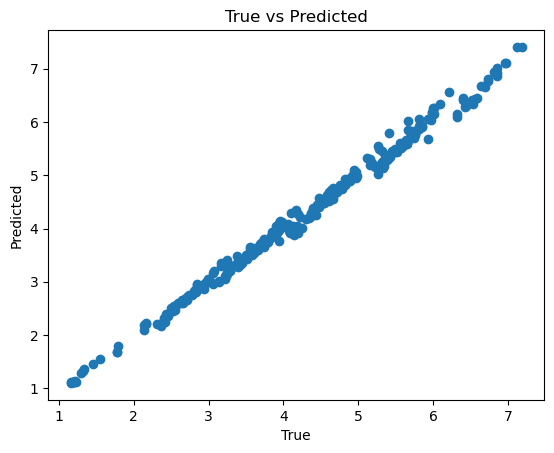

In [19]:
X_train_preds = rf.predict(X_noise_train)
R2 = r2_score(X_train_preds, y_train)

plotter.scatter_plot(X_train_preds, y_train, "True vs Predicted", "True", "Predicted")
print("R2 = {}".format(R2))

R2 = 0.9610822151199281


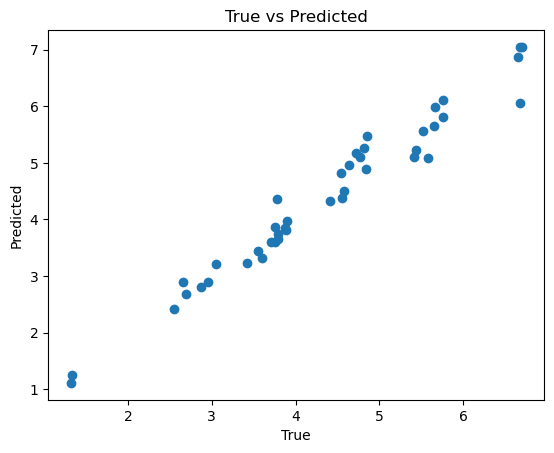

In [20]:
X_val_preds = rf.predict(X_noise_val)
R2 = r2_score(y_val, X_val_preds)

plotter.scatter_plot(X_val_preds, y_val, "True vs Predicted", "True", "Predicted")
print("R2 = {}".format(R2))

# Dimensionality Reduction

In [21]:
pca = PCA(n_components = 10)
pca.fit(X_train)
print(pca.explained_variance_ratio_)

[9.99954678e-01 4.49558914e-05 1.55460698e-07 1.02532455e-07
 7.72589189e-08 1.56139667e-08 1.37839700e-08 1.74778777e-09
 8.48330689e-36 7.22338649e-39]


In [22]:
pca = PCA(n_components = 4)
pca.fit(X_train)
X_train_transformed = pca.transform(X_train)

C:\Users\emilh\AppData\Local\Temp\ipykernel_25888\2268846531.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_transformed, y = y_train)


R2 = 0.9989395635314373


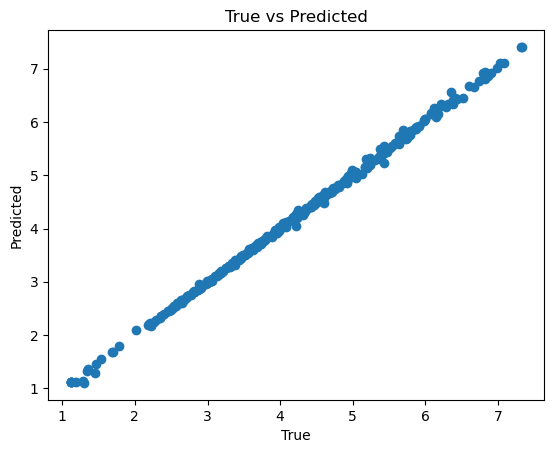

In [23]:
rf = RandomForestRegressor(n_estimators = 1000)
rf.fit(X_train_transformed, y = y_train)

X_train_preds = rf.predict(X_train_transformed)
R2 = r2_score(X_train_preds, y_train)

plotter.scatter_plot(X_train_preds, y_train, "True vs Predicted", "True", "Predicted")
print("R2 = {}".format(R2))

R2 = 0.9953904522416845


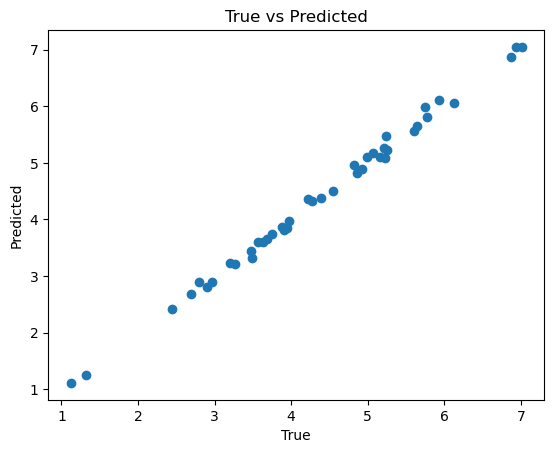

In [24]:
X_val_preds = rf.predict(pca.transform(X_val))
R2 = r2_score(X_val_preds, y_val)

plotter.scatter_plot(X_val_preds, y_val, "True vs Predicted", "True", "Predicted")
print("R2 = {}".format(R2))

# Dimensionality Reduction with Linear Regressor

(336, 2)


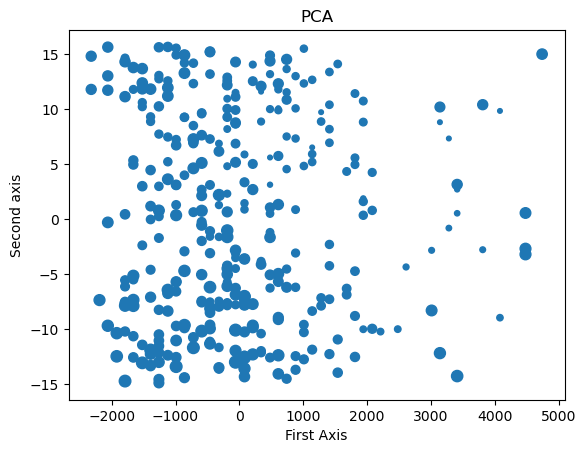

In [25]:
pca = PCA(n_components = 2)
pca.fit(X_train)

X_train_transformed = pca.transform(X_train)
print(X_train_transformed.shape)
plotter.scatter_plot(X_train_transformed[:,0], X_train_transformed[:, 1], title = "PCA", x_axis = "First Axis", y_axis = "Second axis", s = y_train * 10)